In [1]:
# importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import Config
from src.data_processing import DataDict, ItemDict
import json



pd.set_option("display.width", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)


from IPython.display import display

In [2]:
# diretório dos dados
data_dirs = Config.get_path_dir_data()
# caminho para o arquivo csv da variáveis e suas categorias
path_dict = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]

# caminho para os microdados do enem 2023
path_microdados = data_dirs["DADOS"]["MICRODADOS_ENEM_2023.csv"]
# caminho para os itens das provas
path_itens = data_dirs["DADOS"]["ITENS_PROVA_2023.csv"]

# Caminho para o dicionário de variveis dos microdados
path_dict_microdados = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]
# Caminho para o dicionário de variveis dos microdados
path_dict_itens = data_dirs["DICIONÁRIO"]["ITENS_PROVA_2023.csv"]

In [3]:
dir_data = data_dirs["DADOS"]
dir_parquet_data = dir_data["MICRODADOS_ENEM_2023_parquet"]
path_parquet_file = dir_data["MICRODADOS_ENEM_2023.parquet"]
path_parquet_itens = dir_data["ITENS_PROVA_2023.parquet"]

In [4]:
list_parquet = list(dir_parquet_data.list_file().values())

## **Dicionário das variáveis**

In [5]:
dict_microdados = DataDict(path_dict_microdados)
dict_itens = ItemDict(path_dict_itens)

## **Carregar dados**

### **Carregar Microdado enem**

In [6]:
df = pd.read_parquet(path_parquet_file)

### **Carregar Itens**

In [7]:
df_items = pd.read_parquet(path_parquet_itens)

# **Perguntas**

## **Como se distribuem as notas como um todo?**

In [ ]:
# data frame com as variáveis de interesse
variaveis = [var for var in dict_microdados.tabel["Nome da variavel"].values if "NU_NOTA" in var]
df_notas = df[variaveis].dropna()
df_notas = df_notas[df_notas[variaveis] > 0]

In [25]:
table_dict_microdados = dict_microdados.tabel

In [16]:
def get_tukey(series : pd.Series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    media = np.mean(series)

    return limite_inferior, media, limite_superior

In [ ]:
def plot_notas_tukey(series : pd.Series, 
                    legenda :str,
                    inf : float = None,
                    media : float = None, 
                    sup : float = None
                    ):
    series.hist(bins=200, edgecolor ='black')

    plt.axvline(media, color="yellow", linestyle='dashed', linewidth=2, label=f"Média: {media:.2f}")
    plt.axvline(inf, color='red', linestyle='dashed', linewidth=2, label=f'Limite Inferior Tukey: \n{inf:.2f}')
    plt.axvline(sup, color='green', linestyle='dashed', linewidth=2, label=f'Limite Superior Tukey: \n{sup:.2f}')



    plt.title(f'Distribuição da {legenda}')
    plt.xlabel('Nota')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

### **Matemática**

In [20]:
notas_matematica = df_notas["NU_NOTA_MT"]

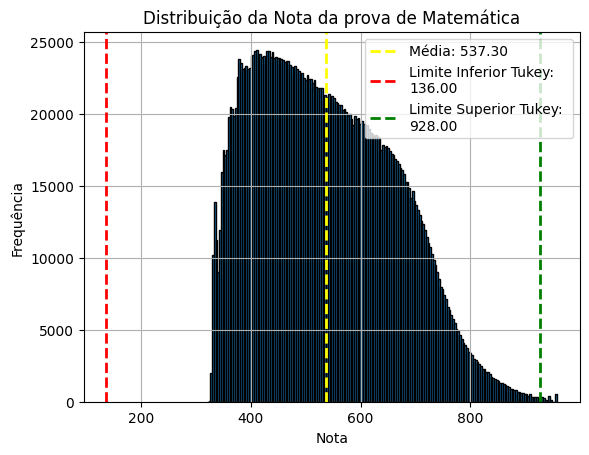

In [31]:
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == "NU_NOTA_MT"]["Descricao"].values[0]
inf, media, sup = get_tukey(notas_matematica)
plot_notas_tukey(notas_matematica, inf, media, sup, descricao)

##  Ciências da Natureza

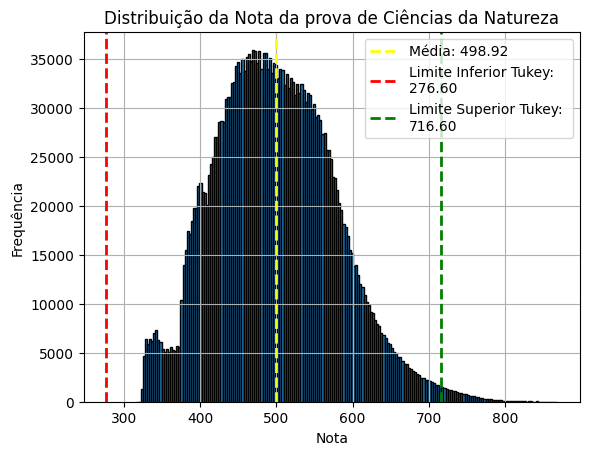

In [33]:
var = "NU_NOTA_CN"
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, inf, media, sup, descricao)

## Ciências humanas

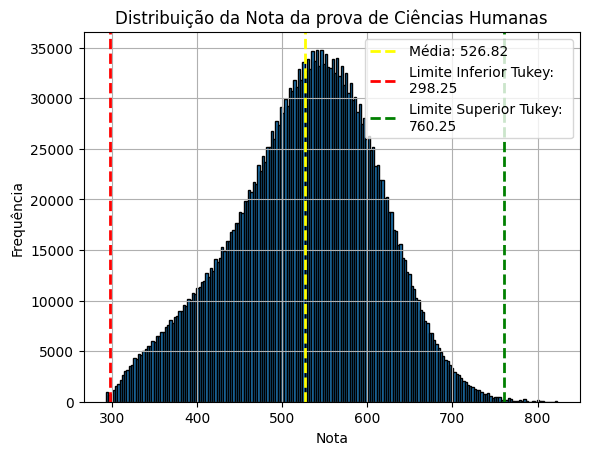

In [35]:
var = "NU_NOTA_CH"
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, inf, media, sup, descricao)

## Linguágens

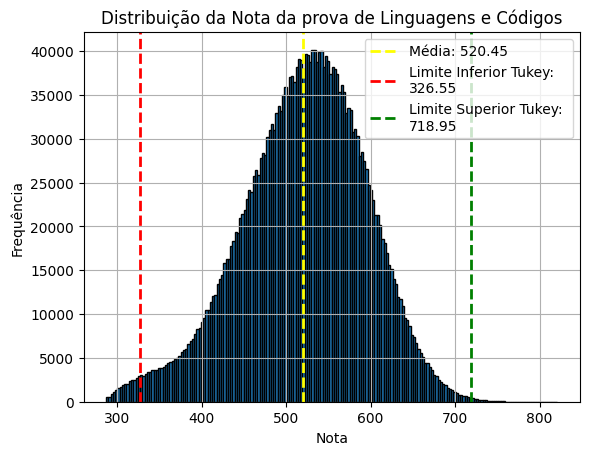

In [36]:
var = "NU_NOTA_LC"
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, inf, media, sup, descricao)

## **Redação**

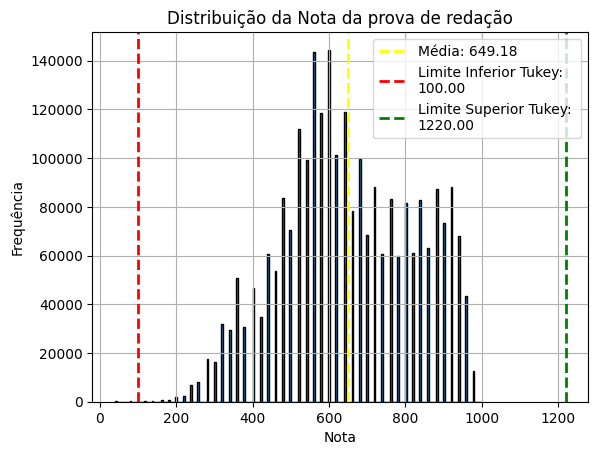

In [37]:
var = "NU_NOTA_REDACAO"
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, inf, media, sup, descricao)

## Competencias em redação

In [40]:
variaveis_comp = [var for var in variaveis if "COMP" in var] 
variaveis_comp

['NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

In [43]:
# notas para cada competencia
dict_notas_comp = {comp : df_notas[comp] for comp in variaveis_comp}

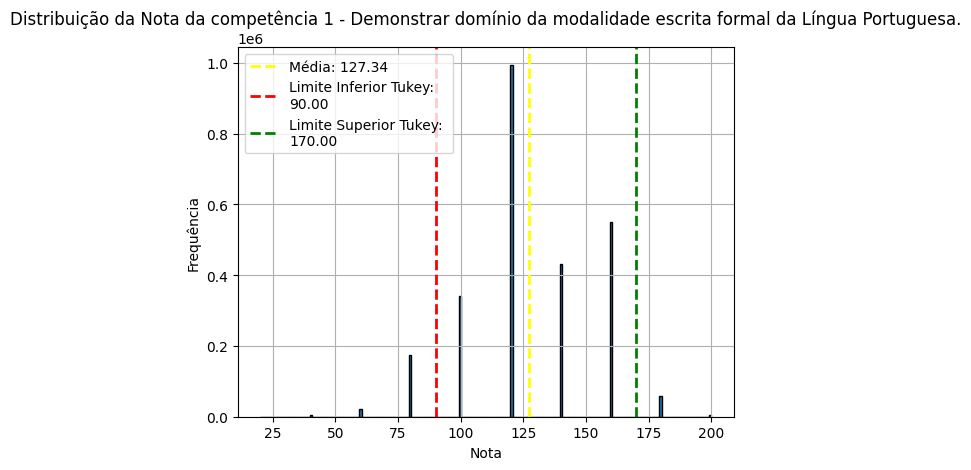

In [44]:
var = variaveis_comp[0]
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, inf, media, sup, descricao)